In [69]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [53]:
data = np.load('prediction-challenge-02-data.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']

In [54]:
y_train = keras.utils.to_categorical(y_train)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=12345)

In [55]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [91]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc',
                                               mode='max',
                                               restore_best_weights=True,
                                               patience=20)


model.fit(x_train, y_train, batch_size=32,
          epochs=1, validation_data=(x_val, y_val),
          verbose=2)

Train on 2250 samples, validate on 750 samples
Epoch 1/1
 - 6s - loss: 0.2829 - acc: 0.8880 - val_loss: 0.9917 - val_acc: 0.6653


In [92]:
predictions = model.predict(x_test)

In [93]:
prediction = np.argmax(predictions, axis=1)

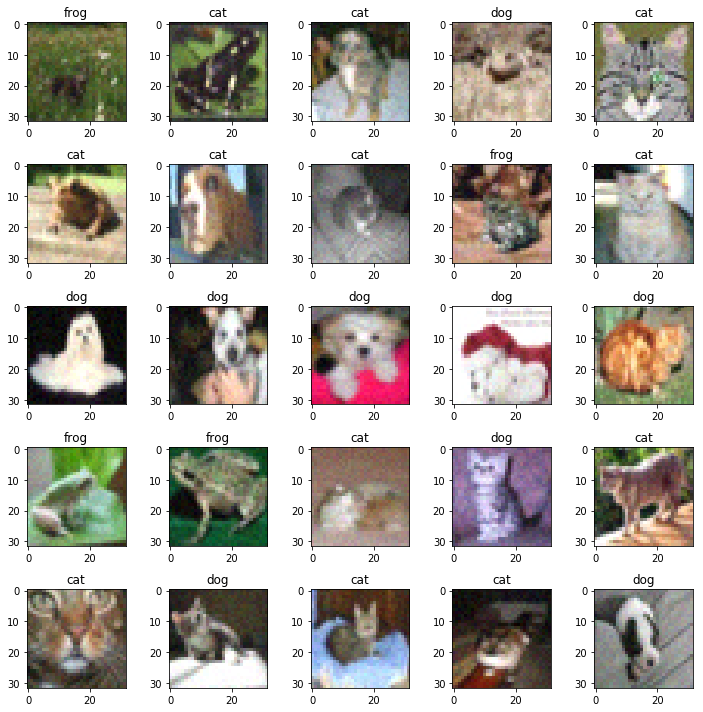

In [94]:
fig,ax = plt.subplots(25,5,figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    if prediction[i] == 0:
        plt.title('cat')
    elif prediction[i] == 1:
        plt.title('dog')
    else:
        plt.title('frog')
plt.tight_layout(h_pad=1.0)        
plt.show()

In [96]:
# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 300

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', prediction)